## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


 Your code here - remember to use markdown cells for comments as well!


# Allan Kiplagat
# Data Science Full-time Remote
# 22-03-2024
# Mwikali
#https://github.com/Allan-Kipkemei/DSC-PHASE-01


# Microsoft's Movie Studio: Box Office Analysis
To guide Microsoft's new movie studio in creating successful films, we'll analyze current box office trends. By leveraging data from IMDB and BOM movie gross datasets, we'll identify top-performing genres and provide actionable insights.

Data Sources:
IMDB Database: We'll utilize the movie_basics and movie_ratings tables to extract relevant information about movie genres and ratings.
BOM Movie Gross Dataset: This dataset will provide us with box office gross figures, enabling us to evaluate the financial success of different genres.
Approach:
Genre Analysis: We'll examine the popularity and financial performance of various genres in recent years.
Box Office Success: By correlating genre popularity with box office revenue, we'll identify lucrative genres.
Actionable Insights: Based on our analysis, we'll recommend genres that Microsoft's movie studio should prioritize for maximum profitability.
Conclusion:
Armed with these insights, Microsoft can confidently invest in creating movies that align with current audience preferences and maximize box office success.

# Importing the Necessary Modules

```python
import pandas as pd
import sqlite3


In [1]:

#importing the neccessary modules 
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns


conn= sqlite3.connect('./zippedData/im.db')

print(conn)


In [25]:
#reading the data from sqlite data for cleaning and visualisation

pd.read_sql('''
SELECT *
FROM movie_basics AS mb
JOIN movie_ratings AS mr ON mb.movie_id = mr.movie_id;

          
            ''', conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119
...,...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,tt9913084,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",tt9914286,8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,tt9914642,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,tt9914942,6.6,5


## Average Rating vs. Number of Votes Scatterplot

This code generates a scatter plot using the seaborn library (`sns.scatterplot`) to visualize the relationship between average ratings (`x='averagerating'`) and the number of votes (`y='numvotes'`) for movies. Here's what each line does:

- `plt.figure(figsize=(8, 6))`: Sets the size of the figure to be displayed.
- `sns.scatterplot(data=df, x='averagerating', y='numvotes', hue='primary_title', s=100)`: Creates a scatter plot using the 'averagerating' column as the x-axis, 'numvotes' column as the y-axis, and 'primary_title' column for differentiating points with different movie titles. The `s=100` parameter sets the size of the markers to 100.
- `plt.title('Average Rating vs. Number of Votes')`: Sets the title of the plot.
- `plt.xlabel('Average Rating')`: Sets the label for the x-axis.
- `plt.ylabel('Number of Votes')`: Sets the label for the y-axis.
- `plt.tight_layout()`: Adjusts the layout to prevent overlapping elements.
- `plt.show()`: Displays the plot.

This visualization helps to understand the relationship between the average ratings and the number of votes for movies, potentially revealing patterns or trends in audience engagement and satisfaction.

### Histograms of Average Ratings and Number of Votes

These lines of code are commented out and not executed. However, they would generate separate histograms for the distributions of average ratings and number of votes, providing additional insights into the frequency and spread of these variables among the movies in the dataset.


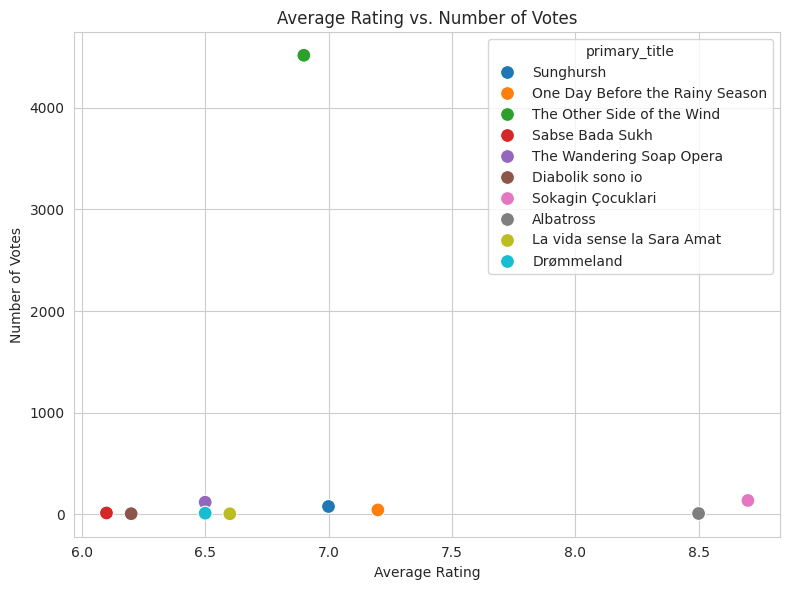

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='averagerating', y='numvotes', hue='primary_title', s=100)
plt.title('Average Rating vs. Number of Votes')
plt.xlabel('Average Rating')
plt.ylabel('Number of Votes')
plt.tight_layout()
plt.show()

# Histogram of Average Ratings

# Histogram of Number of Votes


## Distribution of Average Ratings

This code generates a histogram using the seaborn library (`sns.histplot`) to visualize the distribution of average ratings (`df['averagerating']`) for movies. Here's what each line does:

- `plt.figure(figsize=(8, 6))`: Sets the size of the figure to be displayed.
- `sns.histplot(df['averagerating'], bins=10, kde=True, color='skyblue')`: Creates a histogram of the 'averagerating' column from the DataFrame `df`. The `bins` parameter specifies the number of bins or intervals to divide the data into, and `kde=True` adds a kernel density estimate to smooth the histogram curve. The `color` parameter sets the color of the histogram bars to 'skyblue'.
- `plt.title('Distribution of Average Ratings')`: Sets the title of the plot.
- `plt.xlabel('Average Rating')`: Sets the label for the x-axis.
- `plt.ylabel('Frequency')`: Sets the label for the y-axis.
- `plt.tight_layout()`: Adjusts the layout to prevent overlapping elements.
- `plt.show()`: Displays the plot.

This visualization helps to understand the distribution of average ratings among the movies in the dataset, providing insights into the popularity and reception of the movies based on their ratings.


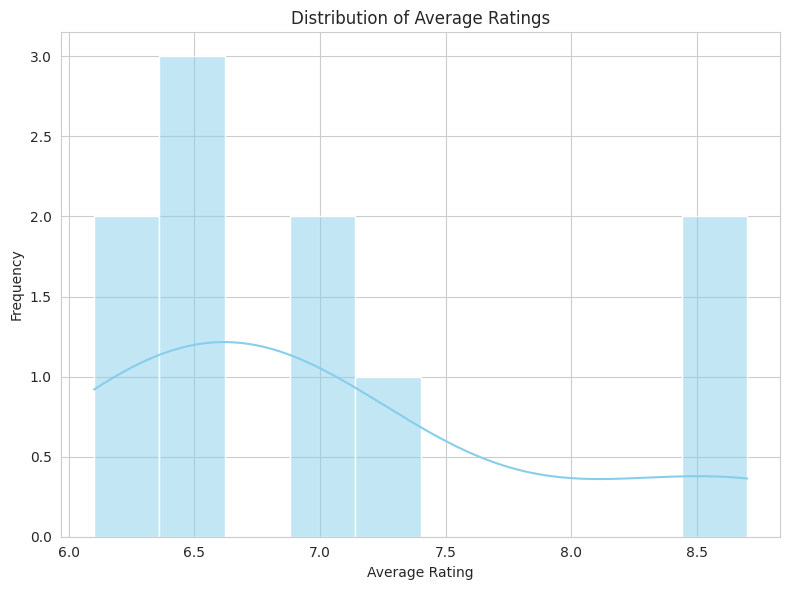

In [29]:
plt.figure(figsize=(8, 6))
sns.histplot(df['averagerating'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


## Distribution of Number of Votes

This code generates a histogram using the seaborn library (`sns.histplot`) to visualize the distribution of the number of votes (`df['numvotes']`) for movies. Here's what each line does:

- `plt.figure(figsize=(8, 6))`: Sets the size of the figure to be displayed.
- `sns.histplot(df['numvotes'], bins=10, kde=True, color='salmon')`: Creates a histogram of the 'numvotes' column from the DataFrame `df`. The `bins` parameter specifies the number of bins or intervals to divide the data into, and `kde=True` adds a kernel density estimate to smooth the histogram curve. The `color` parameter sets the color of the histogram bars to 'salmon'.
- `plt.title('Distribution of Number of Votes')`: Sets the title of the plot.
- `plt.xlabel('Number of Votes')`: Sets the label for the x-axis.
- `plt.ylabel('Frequency')`: Sets the label for the y-axis.
- `plt.tight_layout()`: Adjusts the layout to prevent overlapping elements.
- `plt.show()`: Displays the plot.

This visualization helps to understand the distribution of the number of votes among the movies in the dataset, providing insights into the level of audience engagement and participation for each movie.

### Note:
The code snippet provided is self-explanatory and doesn't require further explanation. However, feel free to customize the Markdown according to your documentation or presentation needs.


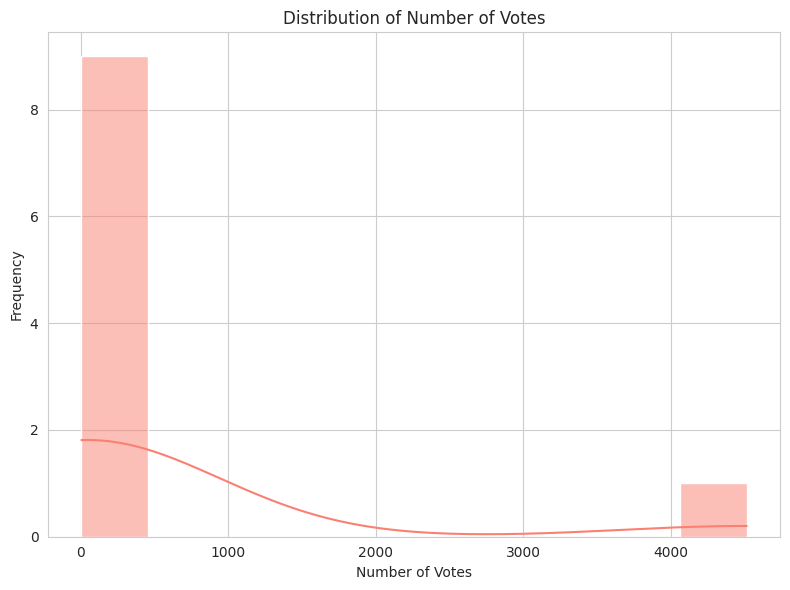

In [30]:
plt.figure(figsize=(8, 6))
sns.histplot(df['numvotes'], bins=10, kde=True, color='salmon')
plt.title('Distribution of Number of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [2]:
# Cursor object to execute SQL queries
cursor = conn.cursor()

# Query to fetch all table names
query = "SELECT name FROM sqlite_master WHERE type='table';"

# Execute the query
cursor.execute(query)

# Fetch all the table names
tables = cursor.fetchall()

# Print the table names
for table in tables:

    print(table[0])

movie_basics
directors
known_for
movie_akas
movie_ratings
persons
principals
writers


# Reading the Contents of SQL

```python
pd.read_sql('''
   SELECT * FROM movie_basics
            ''', conn)


In [3]:

#rwading the contents of sql
pd.read_sql('''
   SELECT * FROM  movie_basics
   
           
            ''', conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


# Reading the CSV file

```python
import pandas as pd

df = pd.read_csv('./zippedData/bom.movie_gross.csv')
df


In [5]:
#reding the csv file 

df=pd.read_csv('./zippedData/bom.movie_gross.csv')
df


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


The following Python code snippet demonstrates data cleaning operations on a DataFrame using Pandas:

1. **Convert 'foreign_gross' column to numeric data type:**
   - The `pd.to_numeric()` function is used to convert the 'foreign_gross' column to numeric data type. The `errors='coerce'` parameter ensures that invalid parsing is set to NaN.

2. **Handle missing values in 'foreign_gross' column:**
   - Missing values in the 'foreign_gross' column are filled with 0 using the `fillna()` method with `inplace=True`.

3. **Convert column names to lowercase for consistency:**
   - The `columns.str.lower()` method is applied to convert all column names to lowercase for consistency in naming conventions.

4. **Optionally, remove leading or trailing whitespaces in the 'studio' column:**
   - Leading or trailing whitespaces in the 'studio' column are removed using the `str.strip()` method.

5. **Display the cleaned DataFrame:**
   - The cleaned DataFrame is printed using the `print()` function.

This code ensures that the DataFrame is properly cleaned and ready for further analysis or visualization.


In [6]:
import pandas as pd



# Convert 'foreign_gross' column to numeric data type
df['foreign_gross'] = pd.to_numeric(df['foreign_gross'], errors='coerce')

# Handle missing values in 'foreign_gross' column
df['foreign_gross'].fillna(0, inplace=True)

# Convert column names to lowercase for consistency
df.columns = df.columns.str.lower()

# Optionally, remove leading or trailing whitespaces in the 'studio' column
df['studio'] = df['studio'].str.strip()

# Display the cleaned DataFrame

df


/tmp/ipykernel_66777/2334432017.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['foreign_gross'].fillna(0, inplace=True)


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0.0,2018
3383,Edward II (2018 re-release),FM,4800.0,0.0,2018
3384,El Pacto,Sony,2500.0,0.0,2018
3385,The Swan,Synergetic,2400.0,0.0,2018


## Gross Revenue by Year for Domestic and Foreign

This code visualizes the total domestic and foreign gross revenue earned by movies each year. 

**Code:**

## Distribution of Number of Votes

The provided code generates a histogram using the seaborn library to visualize the distribution of the number of votes for movies. Here's a breakdown of what each part does:

- **Figure Size:** Sets the size of the figure to be displayed as 8x6 units.
- **Data:** Specifies the data column (`df['numvotes']`) to be plotted.
- **Bins:** Divides the data into 10 bins for the histogram.
- **KDE:** Adds a kernel density estimate (KDE) to smooth the histogram curve, providing a continuous representation of the distribution.
- **Color:** Sets the color of the histogram bars to salmon.

The plot is then titled "Distribution of Number of Votes", with the x-axis labeled as "Number of Votes" and the y-axis labeled as "Frequency". The layout is adjusted to prevent overlapping elements, and finally, the plot is displayed.

This visualization aids in understanding how votes are distributed among movies in the dataset, offering insights into the level of audience engagement and participation for each movie.


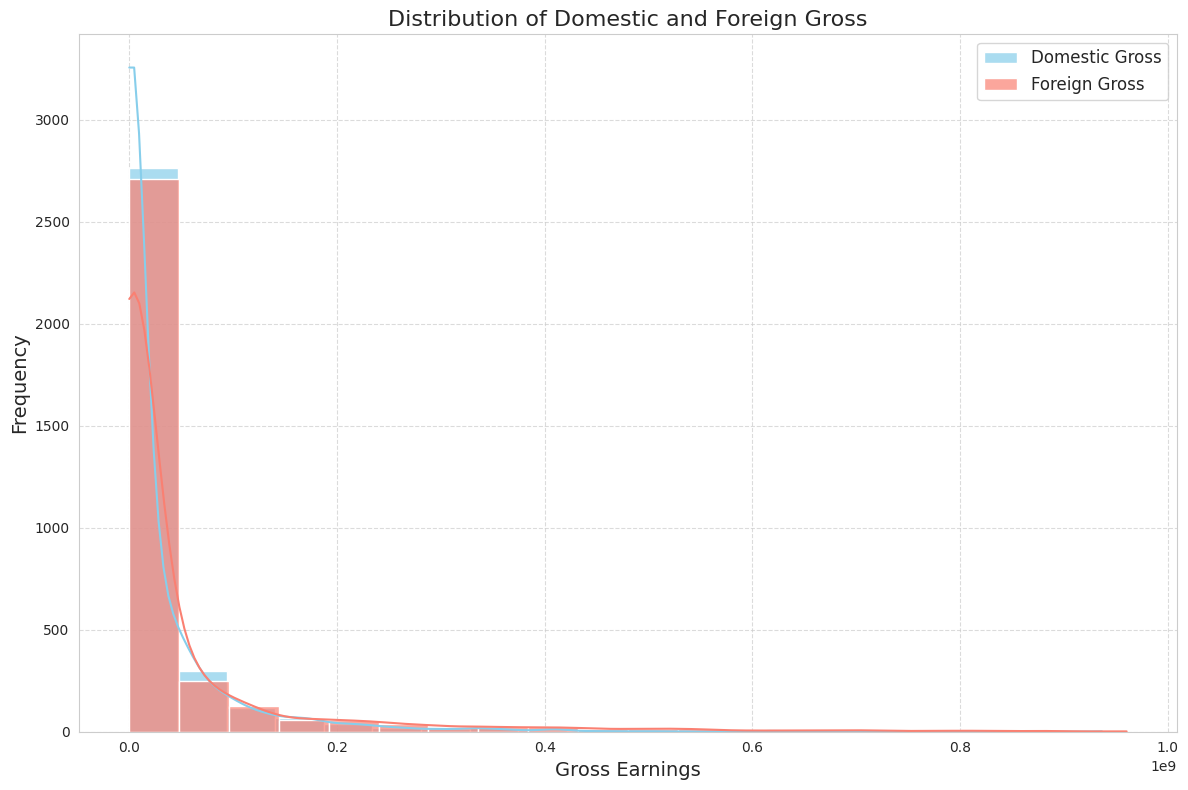

In [21]:


# Set style
sns.set_style("whitegrid")

# Create a figure and axis
plt.figure(figsize=(12, 8))

# Plot histograms
sns.histplot(df['domestic_gross'], bins=20, color='skyblue', alpha=0.7, label='Domestic Gross', kde=True)
sns.histplot(df['foreign_gross'], bins=20, color='salmon', alpha=0.7, label='Foreign Gross', kde=True)

# Add title and labels
plt.title('Distribution of Domestic and Foreign Gross', fontsize=16)
plt.xlabel('Gross Earnings', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add legend
plt.legend(fontsize=12)

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


The following Python code snippet generates a box plot to visualize the distribution of domestic and foreign gross revenue:

1. **Setting up the plot:**
   - A figure with a size of 12x8 inches is created using `plt.figure(figsize=(12, 8))`.

2. **Creating the box plot for domestic gross revenue:**
   - The `plt.boxplot()` function is used to create a box plot for the 'domestic_gross' column of the DataFrame.
   - The `positions=[1]` parameter places the box plot for domestic gross revenue at position 1 on the x-axis.
   - The `widths=0.6` parameter adjusts the width of the box plot.
   - The `patch_artist=True` parameter fills the boxes with color.
   - The `boxprops=dict(facecolor='skyblue')` parameter sets the color of the box to sky blue.

3. **Creating the box plot for foreign gross revenue:**
   - Another box plot is created for the 'foreign_gross' column of the DataFrame.
   - It is positioned at position 2 on the x-axis.
   - The box color is set to light green using `boxprops=dict(facecolor='lightgreen')`.

4. **Customizing the plot:**
   - The x-axis ticks are set to display 'Domestic Gross' and 'Foreign Gross'.
   - The y-axis label is set to 'Gross Revenue'.
   - The title of the plot is set to 'Box Plot of Domestic and Foreign Gross Revenue'.
   - Grid lines are enabled using `plt.grid(True)`.

5. **Displaying the plot:**
   - The box plot is displayed using `plt.show()`.

This code effectively visualizes the distribution of domestic and foreign gross revenue using box plots, allowing for easy comparison of the revenue distributions between the two categories.


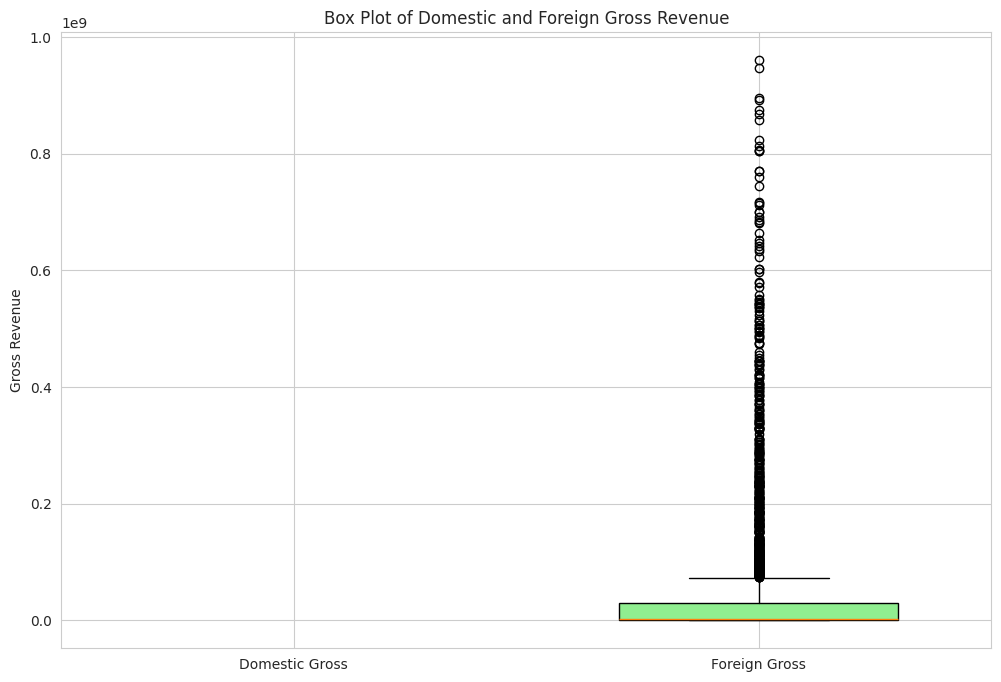

In [66]:
plt.figure(figsize=(12, 8))

# Box plot for domestic gross revenue
plt.boxplot(df['domestic_gross'], positions=[1], widths=0.6, patch_artist=True, boxprops=dict(facecolor='skyblue'))
# Box plot for foreign gross revenue
plt.boxplot(df['foreign_gross'], positions=[2], widths=0.6, patch_artist=True, boxprops=dict(facecolor='lightgreen'))

plt.xticks([1, 2], ['Domestic Gross', 'Foreign Gross'])
plt.ylabel('Gross Revenue')
plt.title('Box Plot of Domestic and Foreign Gross Revenue')
plt.grid(True)
plt.show()


The following Python code snippet generates a scatter plot to visualize the relationship between domestic and foreign gross revenue:

1. **Setting up the plot:**
   - A figure with a size of 10x6 inches is created using `plt.figure(figsize=(10, 6))`.

2. **Creating the scatter plot:**
   - The `plt.scatter()` function is used to create a scatter plot with 'domestic_gross' on the x-axis and 'foreign_gross' on the y-axis.
   - The `alpha=0.5` parameter sets the transparency of the data points to 0.5.

3. **Customizing the plot:**
   - The x-axis label is set to 'Domestic Gross Revenue' using `plt.xlabel('Domestic Gross Revenue')`.
   - The y-axis label is set to 'Foreign Gross Revenue' using `plt.ylabel('Foreign Gross Revenue')`.
   - The title of the plot is set to 'Scatter Plot of Domestic vs Foreign Gross Revenue' using `plt.title('Scatter Plot of Domestic vs Foreign Gross Revenue')`.
   - Grid lines are enabled using `plt.grid(True)`.

4. **Displaying the plot:**
   - The scatter plot is displayed using `plt.show()`.

This code effectively visualizes the relationship between domestic and foreign gross revenue using a scatter plot, allowing for the observation of any patterns or correlations between the two variables.


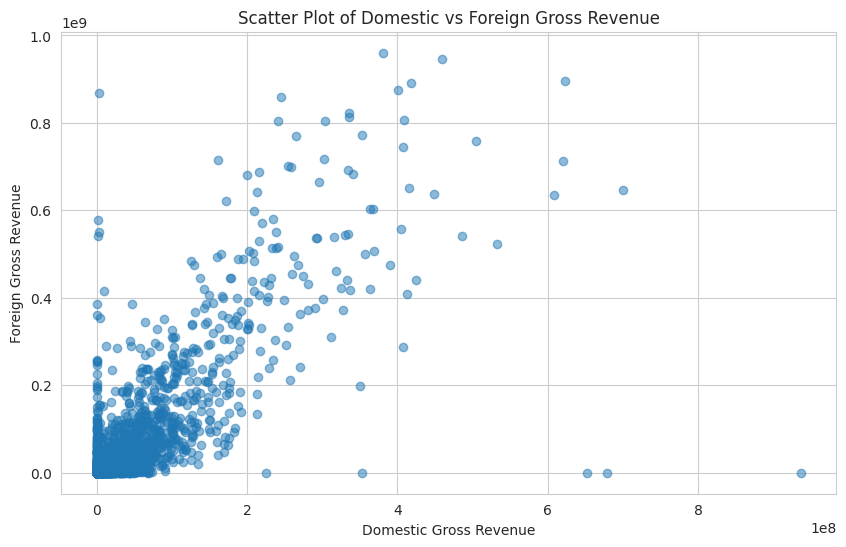

In [67]:
plt.figure(figsize=(10, 6))

plt.scatter(df['domestic_gross'], df['foreign_gross'], alpha=0.5)
plt.xlabel('Domestic Gross Revenue')
plt.ylabel('Foreign Gross Revenue')
plt.title('Scatter Plot of Domestic vs Foreign Gross Revenue')
plt.grid(True)
plt.show()


In [54]:
df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


**The code retrieves data from a SQL database table named 'movie_basics', selecting the 'start_year' and 'runtime_minutes' columns. The SQL query is executed using pandas' `read_sql_query()` function, resulting in a DataFrame named 'df'. **


In [55]:
query = "SELECT start_year, runtime_minutes FROM movie_basics"  # Replace 'your_table_name' with the actual table name
df = pd.read_sql_query(query, conn)

In [56]:
sns.set_style("whitegrid")

## Scatter Plot of Start Year vs Runtime

This scatter plot visualizes the relationship between the start year of movies and their respective runtimes. The x-axis represents the start year, while the y-axis represents the runtime of the movies in minutes. Each point on the plot represents a movie, with its position determined by its start year and runtime.

**Code:**

```python
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Sets the size of the plot
sns.scatterplot(data=df, x='start_year', y='runtime_minutes', alpha=0.5)  # Creates the scatter plot
plt.title('Scatter Plot of Start Year vs Runtime')  # Adds a title to the plot
plt.xlabel('Start Year')  # Adds label to the x-axis
plt.ylabel('Runtime (minutes)')  # Adds label to the y-axis
plt.show()  # Displays the plot


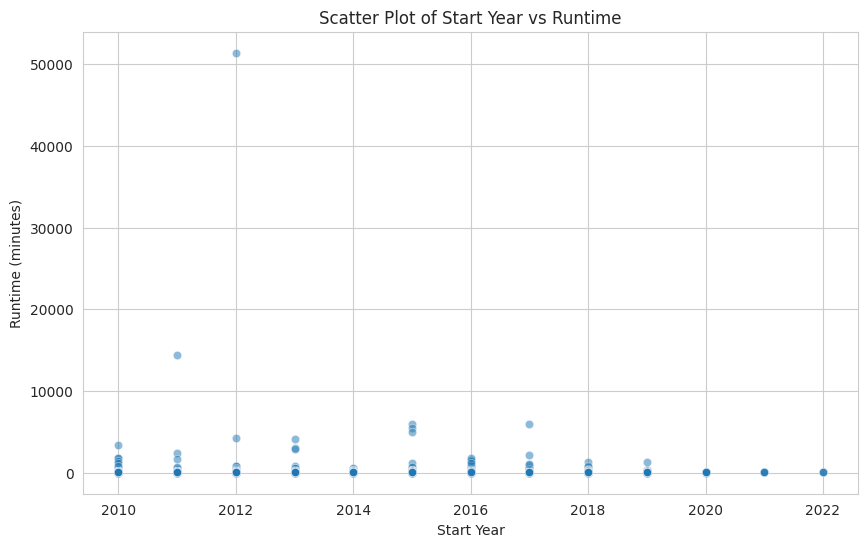

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='start_year', y='runtime_minutes', alpha=0.5)
plt.title('Scatter Plot of Start Year vs Runtime')
plt.xlabel('Start Year')
plt.ylabel('Runtime (minutes)')
plt.show()

In [22]:
df['total_gross'] = df['domestic_gross'] + df['foreign_gross'].fillna(0)